In [2]:
import pandas as pd
import os
from itables import show
import numpy as np

In [89]:
# Directory containing the CSV files
csv_directory = r"D:\Data Science\VS Code\final_project\Verkehrsdataen_Darmstadt\Verkehrsdaten Darmstadt"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

In [90]:
# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through the CSV files and concatenate them
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path, sep=';')
    merged_data = pd.concat([merged_data, df], ignore_index=True)

merged_data.reset_index(drop=True, inplace=True)
show(merged_data)


In [96]:
#get rid of blank spaces in column Bezeichnung
merged_data['Bezeichnung'] = merged_data['Bezeichnung'].str.replace(r'\s', '', regex=True)
merged_data


,Datum,Uhrzeit,Bezeichnung,Intervall,D1Z,D1B,D2Z,D2B,D3Z,D3B,...,D60Z,D60B,D61Z,D61B,D62Z,D62B,D63Z,D63B,D64Z,D64B
0,10.09.2022,08:00,A131,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.09.2022,08:00,A12,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.09.2022,08:00,A32,1,0.0,0.0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.09.2022,08:00,A117,1,0.0,0.0,0.0,0.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.09.2022,08:00,A11,1,1.0,16.0,1.0,13.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460207,02.09.2023,03:25,A152,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460208,02.09.2023,03:25,A156,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460209,02.09.2023,03:25,A174,1,1.0,0.0,2.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460210,02.09.2023,03:25,A151,1,1.0,7.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# import excel sheet with relevant detectors

detectors = pd.read_excel(r"D:\Data Science\VS Code\final_project\Verkehrsdataen_Darmstadt\detectors.xlsx")
detectors

,intersection,detector,inbound,outbound,percentage
0,A1,D11,0,1,100
1,A1,D12,1,0,100
2,A1,D21,0,1,100
3,A1,D22,0,1,100
4,A1,D35,0,1,100
...,...,...,...,...,...
68,A111,D41,0,1,100
69,A111,D21,1,0,10
70,A111,D11,1,0,10
71,A90,D81,0,1,20


In [116]:
#filter traffic data for relevant intersections
intersections = detectors.intersection.unique()

relevant_intersections_df = merged_data.loc[merged_data['Bezeichnung'].isin(intersections)]
show(relevant_intersections_df)

    

In [108]:
#time transformation

relevant_intersections_df['Timestamp'] = pd.to_datetime(relevant_intersections_df['Datum'] + ' ' + relevant_intersections_df['Uhrzeit'], format='%d.%m.%Y %H:%M')
relevant_intersections_df.drop(columns=['Datum', 'Uhrzeit', 'Intervall'], inplace=True)

#create new column for 30 min intervals to match with emission/ weather data
relevant_intersections_df['roundedTimestamp'] = relevant_intersections_df['Timestamp'].dt.round('30min')

relevant_intersections_df.groupby()

C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\4002414130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_intersections_df['Timestamp'] = pd.to_datetime(relevant_intersections_df['Datum'] + ' ' + relevant_intersections_df['Uhrzeit'], format='%d.%m.%Y %H:%M')
C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\4002414130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_intersections_df.drop(columns=['Datum', 'Uhrzeit', 'Intervall'], inplace=True)
C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\4002414130.py:7: SettingWithCopyWarning: 
A

In [109]:
show(relevant_intersections_df.loc[relevant_intersections_df['roundedTimestamp'] == '2022-08-26 07:00:00'], maxBytes=0)

In [88]:
relevant_intersections_df.reset_index(drop=True, inplace=True)

In [110]:
relevant_intersections_df

,Bezeichnung,D1Z,D1B,D2Z,D2B,D3Z,D3B,D4Z,D4B,D5Z,...,D61Z,D61B,D62Z,D62B,D63Z,D63B,D64Z,D64B,Timestamp,roundedTimestamp
4,A11,1.0,16.0,1.0,13.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-10 08:00:00,2022-09-10 08:00:00
23,A111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-10 08:00:00,2022-09-10 08:00:00
25,A1,0.0,0.0,0.0,0.0,6.0,5.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-10 08:00:00,2022-09-10 08:00:00
41,A36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-10 08:00:00,2022-09-10 08:00:00
48,A160,2.0,11.0,1.0,38.0,1.0,2.0,3.0,43.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-10 08:00:00,2022-09-10 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460161,A126,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-02 03:25:00,2023-09-02 03:30:00
1460164,A15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-02 03:25:00,2023-09-02 03:30:00
1460174,A27,1.0,1.0,1.0,7.0,25.0,43.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-02 03:25:00,2023-09-02 03:30:00
1460176,A8,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-02 03:25:00,2023-09-02 03:30:00


In [134]:
#drop all columns that contain only NaNs
relevant_intersections_df.replace(np.nan, None, inplace=True)
relevant_intersections_df.dropna(axis=1, how='all', inplace=True)

relevant_intersections_df.fillna(0, inplace=True)

relevant_intersections_df

C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\1814542670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_intersections_df.replace(np.nan, None, inplace=True)
C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\1814542670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_intersections_df.dropna(axis=1, how='all', inplace=True)
C:\Users\cathr\AppData\Local\Temp\ipykernel_17944\1814542670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Datum,Uhrzeit,Bezeichnung,Intervall,D1Z,D1B,D2Z,D2B,D3Z,D3B,...,D59Z,D59B,D61Z,D61B,D62Z,D62B,D63Z,D63B,D64Z,D64B
4,10.09.2022,08:00,A11,1,1.0,16.0,1.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,10.09.2022,08:00,A111,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,10.09.2022,08:00,A1,1,0.0,0.0,0.0,0.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,10.09.2022,08:00,A36,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,10.09.2022,08:00,A160,1,2.0,11.0,1.0,38.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460161,02.09.2023,03:25,A126,1,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460164,02.09.2023,03:25,A15,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460174,02.09.2023,03:25,A27,1,1.0,1.0,1.0,7.0,25.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460176,02.09.2023,03:25,A8,1,0.0,0.0,0.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
intersection_data_inbound = {}

for i in intersections:
    # Create subsets of relevant data for the current intersection
    relevant_intersections_df_subset = relevant_intersections_df[relevant_intersections_df['Bezeichnung'] == i]
    detectors_subset = detectors[detectors['intersection'] == i]
    
    # Initialize the count for the current intersection
    count_vehicle_inbound = 10
    
    for j, row in detectors_subset.iterrows():
        detector = row['detector'] + 'Z'
        if row['inbound'] == 1:
            count_vehicle_inbound += relevant_intersections_df_subset[detector].values[0]
    
    # Store the total count for the current intersection
    intersection_data_inbound[i] = count_vehicle_inbound
intersection_data_inbound
# The intersection_data_inbound dictionary now contains total inbound vehicle counts for each intersection


KeyError: 'D113Z'

In [153]:
intersection_data_inbound = {}
i = 'A1'

# Create subsets of relevant data for the current intersection
relevant_intersections_df_subset = relevant_intersections_df.loc[relevant_intersections_df['Bezeichnung'] == i]
detectors_subset = detectors[detectors['intersection'] == i]

# Initialize the count for the current intersection
count_vehicle_inbound = 10

for j, row in detectors_subset.iterrows():
    
    if row['inbound'] == 1:
        detector = row['detector'] + 'Z'
        count_vehicle_inbound += relevant_intersections_df_subset[detector].sum()



intersection_data_inbound[i] = count_vehicle_inbound
intersection_data_inbound
# The intersection_data_inbound dictionary now contains total inbound vehicle counts for each intersection


{'A1': 937.0}

In [145]:
relevant_intersections_df_subset[detector].sum()

0.0

In [215]:
relevant_intersections_df_subset = relevant_intersections_df.loc[relevant_intersections_df['Bezeichnung'] == 'A1']
relevant_intersections_df_subset.loc[relevant_intersections_df_subset['Datum'] == '10.09.2022']
pattern = r'\w\d{1,3}B'


relevant_intersections_df_subset = relevant_intersections_df_subset.drop(columns=[col for col in relevant_intersections_df_subset.columns if pd.Series(col).str.contains(pattern).any()])

relevant_intersections_df_subset['Uhrzeit'] = pd.to_datetime(relevant_intersections_df_subset['Uhrzeit'])
relevant_intersections_df_subset['roundedTimestamp'] = relevant_intersections_df_subset['Uhrzeit'].dt.round('30min')
relevant_intersections_df_subset['roundedTimestamp'] = relevant_intersections_df_subset['roundedTimestamp'].dt.time
relevant_intersections_df_subset['roundedTimestamp'] = relevant_intersections_df_subset['roundedTimestamp'].astype('string')
relevant_intersections_df_subset.drop(columns = ['Intervall', 'Bezeichnung', 'Datum', 'Uhrzeit'], inplace=True)

relevant_intersections_df_subset = relevant_intersections_df_subset.groupby('roundedTimestamp').sum().reset_index()

show(relevant_intersections_df_subset)

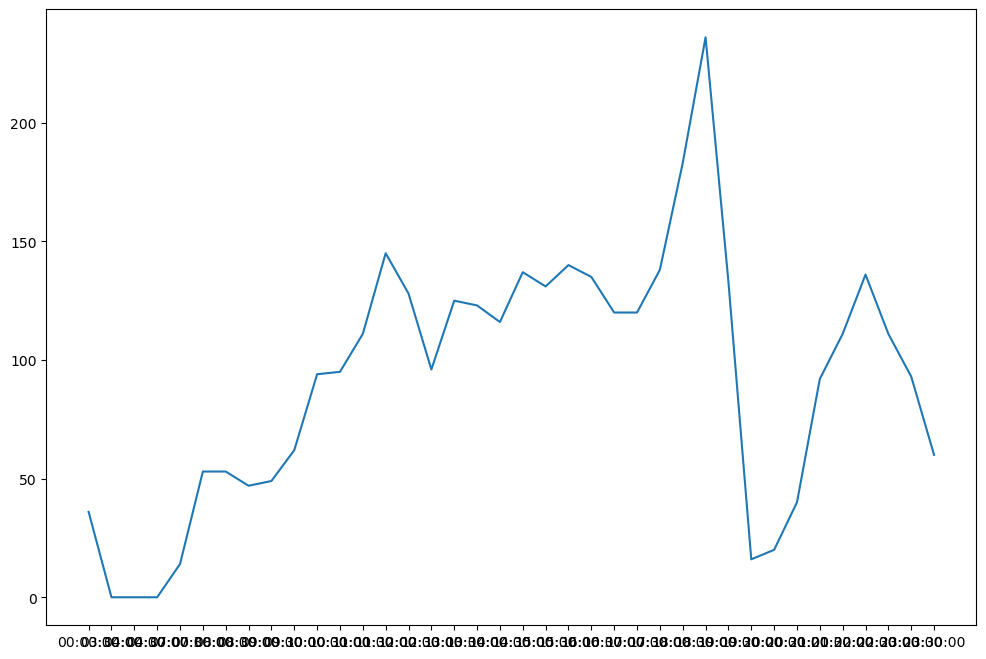

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(relevant_intersections_df_subset['roundedTimestamp'], relevant_intersections_df_subset['D4Z'])
plt.show()

In [212]:
describe = relevant_intersections_df_subset.describe()
pattern = r'\w\d{1,3}B'


describe = describe.drop(columns=[col for col in describe.columns if pd.Series(col).str.contains(pattern).any()])

show(describe)
